In [ ]:
!pip install yfinance

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=0929d661a4bd644d3101eeb8577ce46d26a52df5231ce255d359843c32c55bf9
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
# Standard libraries
from datetime import datetime
import math
from numpy import array

# Data handling libraries
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

# Data preprocessing libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.exceptions import DataConversionWarning
# Machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

# Other
from tabulate import tabulate

In [ ]:
end=start = datetime(2024, 5, 30)

start = datetime(2018, 1, 1)

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# Download stock data from Yahoo Finance
stock_data = {}
for stock in tech_list:
    try:
        stock_data[stock] = yf.download(stock, start, end)
    except Exception as e:
        print(f"Error fetching data for {stock}: {e}")
# Create DataFrames for each company
apple_df = stock_data['AAPL'].copy()
google_df = stock_data['GOOG'].copy()
microsoft_df = stock_data['MSFT'].copy()
amazon_df = stock_data['AMZN'].copy()

# Add company name to each DataFrame
apple_df['Company'] = 'APPLE'
google_df['Company'] = 'GOOGLE'
microsoft_df['Company'] = 'MICROSOFT'
amazon_df['Company'] = 'AMAZON'

# Display the head of each DataFrame
print("Apple DataFrame:")
print(apple_df.head())
print("\nGoogle DataFrame:")
print(google_df.head())
print("\nMicrosoft DataFrame:")
print(microsoft_df.head())
print("\nAmazon DataFrame:")
print(amazon_df.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Apple DataFrame:
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.670982  102223600   
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.663883  118071600   
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.852779   89738400   
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.317898   94640000   
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.164421   82271200   

           Company  
Date                
2018-01-02   APPLE  
2018-01-03   APPLE  
2018-01-04   APPLE  
2018-01-05   APPLE  
2018-01-08   APPLE  

Google DataFrame:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-01-02  52.417000  53.347000  52.261501  53.250000  53.189472  24752000   
2018-01-03  53.2155

In [ ]:
stock_data = {
    "APPLE": apple_df,
    "GOOGLE": google_df,
    "MICROSOFT": microsoft_df,
    "AMAZON": amazon_df
}

# Display the shape, NaN values, and head of each DataFrame using tabulate
for company, df in stock_data.items():
    print(f"{company} DataFrame:")

    # Shape
    shape_table = [["Rows", df.shape[0]], ["Columns", df.shape[1]]]
    print("Shape:")
    print(tabulate(shape_table, headers=["Dimension", "Count"], tablefmt="grid"))
    print()

    # NaN values
    nan_table = df.isna().sum().reset_index()
    nan_table.columns = ["Column", "NaN Count"]
    print("NaN values:")
    print(tabulate(nan_table, headers="keys", tablefmt="grid"))
    print()

    # Head
    print("Head:")
    print(tabulate(df.head(), headers="keys", tablefmt="grid"))
    print("\n")

APPLE DataFrame:
Shape:
+-------------+---------+
| Dimension   |   Count |
+=============+=========+
| Rows        |    1612 |
+-------------+---------+
| Columns     |       7 |
+-------------+---------+

NaN values:
+----+-----------+-------------+
|    | Column    |   NaN Count |
+====+===========+=============+
|  0 | Open      |           0 |
+----+-----------+-------------+
|  1 | High      |           0 |
+----+-----------+-------------+
|  2 | Low       |           0 |
+----+-----------+-------------+
|  3 | Close     |           0 |
+----+-----------+-------------+
|  4 | Adj Close |           0 |
+----+-----------+-------------+
|  5 | Volume    |           0 |
+----+-----------+-------------+
|  6 | Company   |           0 |
+----+-----------+-------------+

Head:
+---------------------+---------+---------+---------+---------+-------------+-----------+-----------+
| Date                |    Open |    High |     Low |   Close |   Adj Close |    Volume | Company   |
+========

In [ ]:
# Define a function to display information about a DataFrame
def display_info(df, company_name):
    print(f"{'='*20} {company_name} {'='*20}")
    print("\nInfo:")
    print(tabulate(df.info(), headers='keys', tablefmt='grid'))
    print("\nType:")
    print(type(df))
    print("\nDescribe:")
    print(tabulate(df.describe(), headers='keys', tablefmt='grid'))
    print('\n')

# Display information for each DataFrame
display_info(apple_df, "APPLE")
display_info(google_df, "GOOGLE")
display_info(microsoft_df, "MICROSOFT")
display_info(amazon_df, "AMAZON")

==================== APPLE ====================

Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1612 entries, 2018-01-02 to 2024-05-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1612 non-null   float64
 1   High       1612 non-null   float64
 2   Low        1612 non-null   float64
 3   Close      1612 non-null   float64
 4   Adj Close  1612 non-null   float64
 5   Volume     1612 non-null   int64  
 6   Company    1612 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 100.8+ KB


Type:
<class 'pandas.core.frame.DataFrame'>

Describe:
+-------+-----------+-----------+-----------+-----------+-------------+----------------+
|       |      Open |      High |       Low |     Close |   Adj Close |         Volume |
+=======+===========+===========+===========+===========+=============+================+
| count | 1612      | 1612      | 1612      | 1612      |   1612      | 1

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


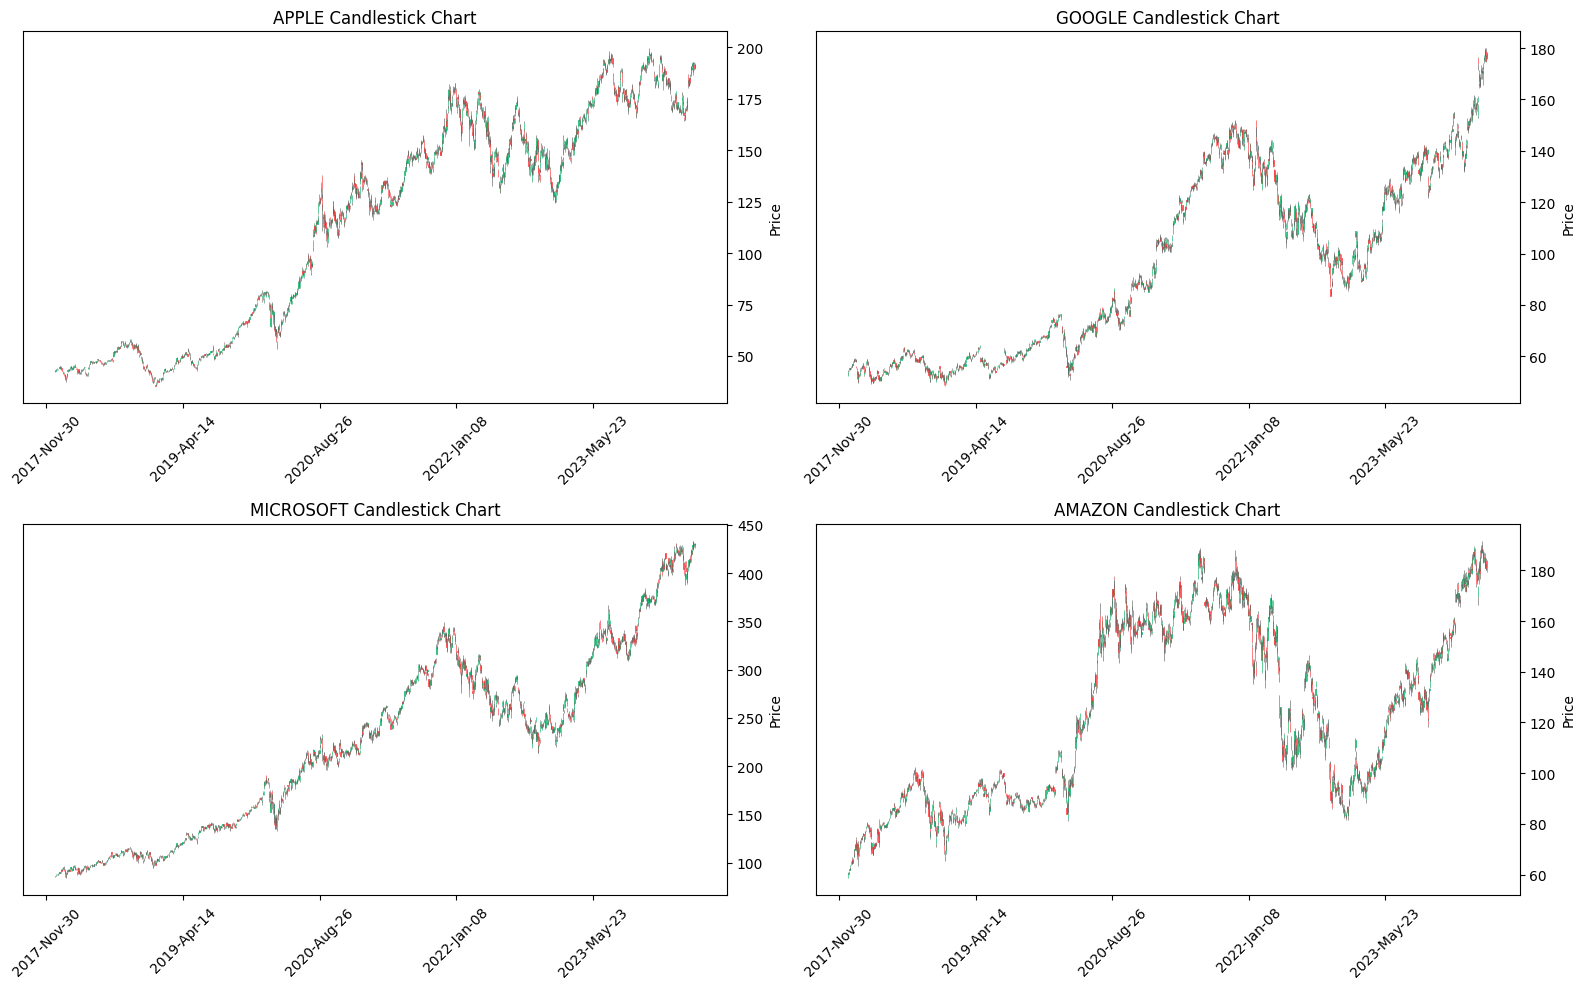

In [ ]:
# Create a 2x2 grid for plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot candlestick chart for each company in the 2x2 grid
for ax, (company, df) in zip(axes, stock_data.items()):
    mpf.plot(df, type='candle', style='yahoo', volume=False, ax=ax, show_nontrading=True)
    ax.set_title(f'{company} Candlestick Chart')
    ax.set_ylabel('Price')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.dates as mdates
import pandas_ta as ta
from datetime import datetime


# Calculate technical indicators using pandas_ta for each stock
for company, df in stock_data.items():
    # Calculate technical indicators
    df.ta.macd(append=True)
    df.ta.rsi(append=True)
    df.ta.bbands(append=True)
    df.ta.obv(append=True)
    df.ta.sma(length=20, append=True)
    df.ta.ema(length=50, append=True)
    df.ta.stoch(append=True)
    df.ta.adx(append=True)
    df.ta.willr(append=True)
    df.ta.cmf(append=True)
    df.ta.psar(append=True)

    # Convert OBV to million
    df['OBV_in_million'] = df['OBV'] / 1e6
    df['MACD_histogram_12_26_9'] = df['MACDh_12_26_9']

    # Check if necessary columns exist
    if 'Adj Close' not in df.columns:
        print(f"Data for {company} does not contain 'Adj Close' column. Skipping plotting.")
        continue

    # Plotting additional technical indicators for each company
    fig, axes = plt.subplots(3, 3, figsize=(20, 14))
    axes = axes.flatten()

    # Price Trend Chart
    axes[0].plot(df.index, df['Adj Close'], label='Adj Close', color='blue')
    axes[0].plot(df.index, df['EMA_50'], label='EMA 50', color='green')
    axes[0].plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    axes[0].set_title(f"Price Trend ({company})")
    axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[0].tick_params(axis='x', rotation=45, labelsize=8)
    axes[0].legend()

    # On-Balance Volume Chart
    axes[1].plot(df.index, df['OBV_in_million'], label='On-Balance Volume (Millions)')
    axes[1].set_title(f'On-Balance Volume (OBV) Indicator ({company})')
    axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[1].tick_params(axis='x', rotation=45, labelsize=8)
    axes[1].legend()

    # MACD Plot
    axes[2].plot(df.index, df['MACD_12_26_9'], label='MACD')
    axes[2].plot(df.index, df['MACD_histogram_12_26_9'], label='MACD Histogram')
    axes[2].set_title(f'MACD Indicator ({company})')
    axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[2].tick_params(axis='x', rotation=45, labelsize=8)
    axes[2].legend()

    # RSI Plot
    axes[3].plot(df.index, df['RSI_14'], label='RSI')
    axes[3].axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    axes[3].axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    axes[3].set_title(f'RSI Indicator ({company})')
    axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[3].tick_params(axis='x', rotation=45, labelsize=8)
    axes[3].legend()

    # Bollinger Bands Plot
    axes[4].plot(df.index, df['BBU_5_2.0'], label='Upper BB')
    axes[4].plot(df.index, df['BBM_5_2.0'], label='Middle BB')
    axes[4].plot(df.index, df['BBL_5_2.0'], label='Lower BB')
    axes[4].plot(df.index, df['Adj Close'], label='Adj Close', color='brown')
    axes[4].set_title(f"Bollinger Bands ({company})")
    axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[4].tick_params(axis='x', rotation=45, labelsize=8)
    axes[4].legend()

    # Stochastic Oscillator Plot
    axes[5].plot(df.index, df['STOCHk_14_3_3'], label='Stoch %K')
    axes[5].plot(df.index, df['STOCHd_14_3_3'], label='Stoch %D')
    axes[5].set_title(f"Stochastic Oscillator ({company})")
    axes[5].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[5].tick_params(axis='x', rotation=45, labelsize=8)
    axes[5].legend()

    # Williams %R Plot
    axes[6].plot(df.index, df['WILLR_14'])
    axes[6].set_title(f"Williams %R ({company})")
    axes[6].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[6].tick_params(axis='x', rotation=45, labelsize=8)

    # ADX Plot
    axes[7].plot(df.index, df['ADX_14'])
    axes[7].set_title(f"Average Directional Index (ADX) ({company})")
    axes[7].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[7].tick_params(axis='x', rotation=45, labelsize=8)

    # CMF Plot
    axes[8].plot(df.index, df['CMF_20'])
    axes[8].set_title(f"Chaikin Money Flow (CMF) ({company})")
    axes[8].xaxis.set_major_formatter(mdates.DateFormatter('%b%d'))
    axes[8].tick_params(axis='x', rotation=45, labelsize=8)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
google_df

,Open,High,Low,Close,Adj Close,Volume,Company,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,DMP_14,DMN_14,WILLR_14,CMF_20,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2,OBV_in_million,MACD_histogram_12_26_9
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,52.417000,53.347000,52.261501,53.250000,53.189472,24752000,GOOGLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0,24.7520,NaN
2018-01-03,53.215500,54.314499,53.160500,54.124001,54.062481,28604000,GOOGLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.261501,NaN,0.04,0,53.3560,NaN
2018-01-04,54.400002,54.678501,54.200100,54.320000,54.258255,20092000,GOOGLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.261501,NaN,0.06,0,73.4480,NaN
2018-01-05,54.700001,55.212502,54.599998,55.111500,55.048855,25582000,GOOGLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.406521,NaN,0.08,0,99.0300,NaN
2018-01-08,55.111500,55.563499,55.081001,55.347000,55.284088,20952000,GOOGLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.631000,NaN,0.10,0,119.9820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,178.399994,178.852005,176.779999,178.000000,177.797668,16189400,GOOGLE,5.168382,0.279808,4.888574,...,34.116316,17.155848,-13.026031,0.229968,161.748608,NaN,0.06,0,2139.7442,0.279808
2024-05-23,178.779999,179.910004,174.539993,175.059998,174.861008,14928400,GOOGLE,4.835646,-0.042343,4.877988,...,30.515087,19.748062,-34.460878,0.138141,162.840691,NaN,0.06,0,2124.8158,-0.042343
2024-05-24,176.520004,177.304001,175.199997,176.330002,176.129578,11400600,GOOGLE,4.621158,-0.205464,4.826622,...,29.131262,18.852510,-25.510884,0.169817,163.867250,NaN,0.06,0,2136.2164,-0.205464


In [11]:
google_df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
Open,1612.000000,95.388317,34.429918,48.695000,48.695000,60.287498,63.083650,92.514999,128.120247,133.364395,178.779999,178.779999
High,1612.000000,96.478711,34.767431,50.176998,50.176998,60.898398,63.705450,93.952499,129.921505,134.787994,179.949997,179.949997
Low,1612.000000,94.414590,34.122955,48.505501,48.505501,59.932876,62.498051,91.204498,126.570614,132.158401,177.309998,177.309998
Close,1612.000000,95.473274,34.455338,48.811001,48.811001,60.364250,63.176950,92.285000,127.922752,133.639999,179.539993,179.539993
Adj Close,1612.000000,95.364753,34.416173,48.755520,48.755520,60.295637,63.105139,92.180103,127.777346,133.488098,179.335922,179.335922
Volume,1612.000000,29548428.598015,13134266.166107,6936000.000000,6936000.000000,21017175.000000,21955240.000000,26361000.000000,33794175.000000,36464000.000000,124140000.000000,124140000.000000
MACD_12_26_9,1587.000000,0.490609,1.784045,-5.105882,-5.105882,-0.491945,-0.204825,0.579930,1.630045,1.876897,5.218553,5.218553
MACDh_12_26_9,1579.000000,0.014327,0.566587,-1.953873,-1.953873,-0.296858,-0.217746,0.029967,0.327908,0.422950,1.690893,1.690893
MACDs_12_26_9,1579.000000,0.483524,1.657562,-4.639486,-4.639486,-0.489591,-0.223564,0.614759,1.515834,1.809332,4.888574,4.888574
RSI_14,1598.000000,54.179394,11.261342,24.077304,24.077304,45.963966,48.031635,54.844512,62.611067,64.107648,94.409356,94.409356


In [12]:
columns_to_drop = ['PSARs_0.02_0.2', 'PSARr_0.02_0.2','PSARl_0.02_0.2','Company']

# Drop the columns from google_df
google_df.drop(columns=columns_to_drop, inplace=True)
# Drop the columns from apple_df
apple_df.drop(columns=columns_to_drop, inplace=True)

# Drop the columns from microsoft_df
microsoft_df.drop(columns=columns_to_drop, inplace=True)

# Drop the columns from amazon_df
amazon_df.drop(columns=columns_to_drop, inplace=True)

In [13]:
# Drop NaN values from google_df
google_df.dropna(inplace=True)

# Drop NaN values from apple_df

apple_df.dropna(inplace=True)
# Drop NaN values from microsoft_df
microsoft_df.dropna(inplace=True)

# Drop NaN values from amazon_df
amazon_df.dropna(inplace=True)

In [14]:
amazon_df

,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,...,STOCHk_14_3_3,STOCHd_14_3_3,ADX_14,DMP_14,DMN_14,WILLR_14,CMF_20,PSARaf_0.02_0.2,OBV_in_million,MACD_histogram_12_26_9
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-14,79.849998,80.321999,79.544502,79.550003,79.550003,85188000,2.718551,0.093871,2.624680,73.193860,...,86.996511,92.314434,18.481329,34.011608,18.432515,-16.329251,0.182807,0.20,1860.2420,0.093871
2018-03-15,79.750000,79.845497,78.905502,79.115997,79.115997,81394000,2.649811,0.020105,2.629706,70.281764,...,81.312158,86.911902,18.812907,32.602357,20.485449,-21.669877,0.108389,0.20,1778.8480,0.020105
2018-03-16,79.172501,79.472000,78.375000,78.584000,78.584000,108500000,2.523320,-0.085109,2.608429,66.774713,...,77.928178,82.078949,18.695060,30.988632,21.865130,-28.216336,0.045134,0.20,1670.3480,-0.085109
2018-03-19,77.726501,78.083000,76.267502,77.246498,77.246498,131616000,2.288766,-0.255731,2.544496,58.826949,...,68.479641,75.906659,17.415042,27.853406,28.857492,-44.674865,0.082601,0.02,1538.7320,-0.255731
2018-03-20,77.516998,79.349998,77.270500,79.325500,79.325500,91632000,2.244762,-0.239788,2.484549,65.667404,...,69.338983,71.915600,16.698935,30.768538,26.259443,-19.091851,0.125728,0.02,1630.3640,-0.239788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800,0.917854,-0.539936,1.457790,49.300383,...,31.773024,42.712692,10.094482,22.818139,22.274740,-78.264790,0.049477,0.06,6536.5191,-0.539936
2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200,0.578560,-0.703384,1.281944,45.071025,...,19.187917,31.671839,9.830133,20.921777,23.779813,-91.652310,-0.022103,0.08,6502.8489,-0.703384
2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100,0.282206,-0.799790,1.081996,44.478346,...,11.949603,20.970181,9.584665,20.099207,22.844875,-94.234093,-0.064425,0.08,6475.4148,-0.799790


In [15]:
amazon_df.describe(percentiles=[0, .25, .30, .50, .75, .80, 1]).T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,0%,25%,30%,50%,75%,80%,100%,max
Open,1563.000000,125.192048,34.241148,67.300003,67.300003,92.627251,95.099998,122.400002,158.648499,162.265897,189.160004,189.160004
High,1563.000000,126.684287,34.553731,69.801498,69.801498,93.682499,96.026299,123.760002,160.251495,164.134998,191.699997,191.699997
Low,1563.000000,123.578096,33.895249,65.349998,65.349998,91.524998,93.964200,120.622498,156.512253,160.431799,187.440002,187.440002
Close,1563.000000,125.150859,34.197070,67.197998,67.197998,92.577747,95.026599,122.279999,158.333748,162.204898,189.500000,189.500000
Adj Close,1563.000000,125.150859,34.197070,67.197998,67.197998,92.577747,95.026599,122.279999,158.333748,162.204898,189.500000,189.500000
Volume,1563.000000,78356222.008957,38799984.686989,17626000.000000,17626000.000000,52722050.000000,55617200.000000,67018000.000000,92938000.000000,101254400.000000,311346000.000000,311346000.000000
MACD_12_26_9,1563.000000,0.496020,2.763871,-12.431501,-12.431501,-1.087443,-0.697848,0.745113,2.193943,2.604928,8.134473,8.134473
MACDh_12_26_9,1563.000000,-0.004795,0.878079,-3.317492,-3.317492,-0.476876,-0.359531,0.007185,0.490279,0.605811,3.392966,3.392966
MACDs_12_26_9,1563.000000,0.500815,2.585801,-10.695326,-10.695326,-0.942485,-0.600036,0.789339,2.038226,2.596894,6.962658,6.962658
RSI_14,1563.000000,53.115371,11.415223,21.168752,21.168752,44.800755,46.611404,53.558891,61.504276,63.064540,81.289460,81.289460


In [16]:
# Calculate daily return for each company and add it to the respective DataFrame
apple_df['Daily Return'] = apple_df['Close'].pct_change()
google_df['Daily Return'] = google_df['Close'].pct_change()
microsoft_df['Daily Return'] = microsoft_df['Close'].pct_change()
amazon_df['Daily Return'] = amazon_df['Close'].pct_change()


# Display the head of each DataFrame with Daily Return and Volatility
print("Apple DataFrame with Daily Return :")
print(apple_df.head(8))  # Show more rows to see non-NaN values
print("\nGoogle DataFrame with Daily Return :")
print(google_df.head(8))  # Show more rows to see non-NaN values
print("\nMicrosoft DataFrame with Daily :")
print(microsoft_df.head(8))  # Show more rows to see non-NaN values
print("\nAmazon DataFrame with Daily Return :")
print(amazon_df.head(8))  # Show more rows to see non-NaN values

Apple DataFrame with Daily Return :
                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2018-03-14  45.080002  45.130001  44.452499  44.610001  42.301868  117473600   
2018-03-15  44.625000  45.060001  44.517502  44.662498  42.351643   90975200   
2018-03-16  44.662498  44.779999  44.404999  44.505001  42.202297  157618800   
2018-03-19  44.330002  44.367500  43.415001  43.825001  41.557468  133787200   
2018-03-20  43.810001  44.200001  43.735001  43.810001  41.543240   78597600   
2018-03-21  43.759998  43.772499  42.814999  42.817501  40.602104  148219600   
2018-03-22  42.500000  43.169998  42.150002  42.212502  40.028412  165963200   
2018-03-23  42.097500  42.480000  41.235001  41.235001  39.101482  164115200   

            MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9     RSI_14  ...  \
Date                                                               ...   
2018-03-14     

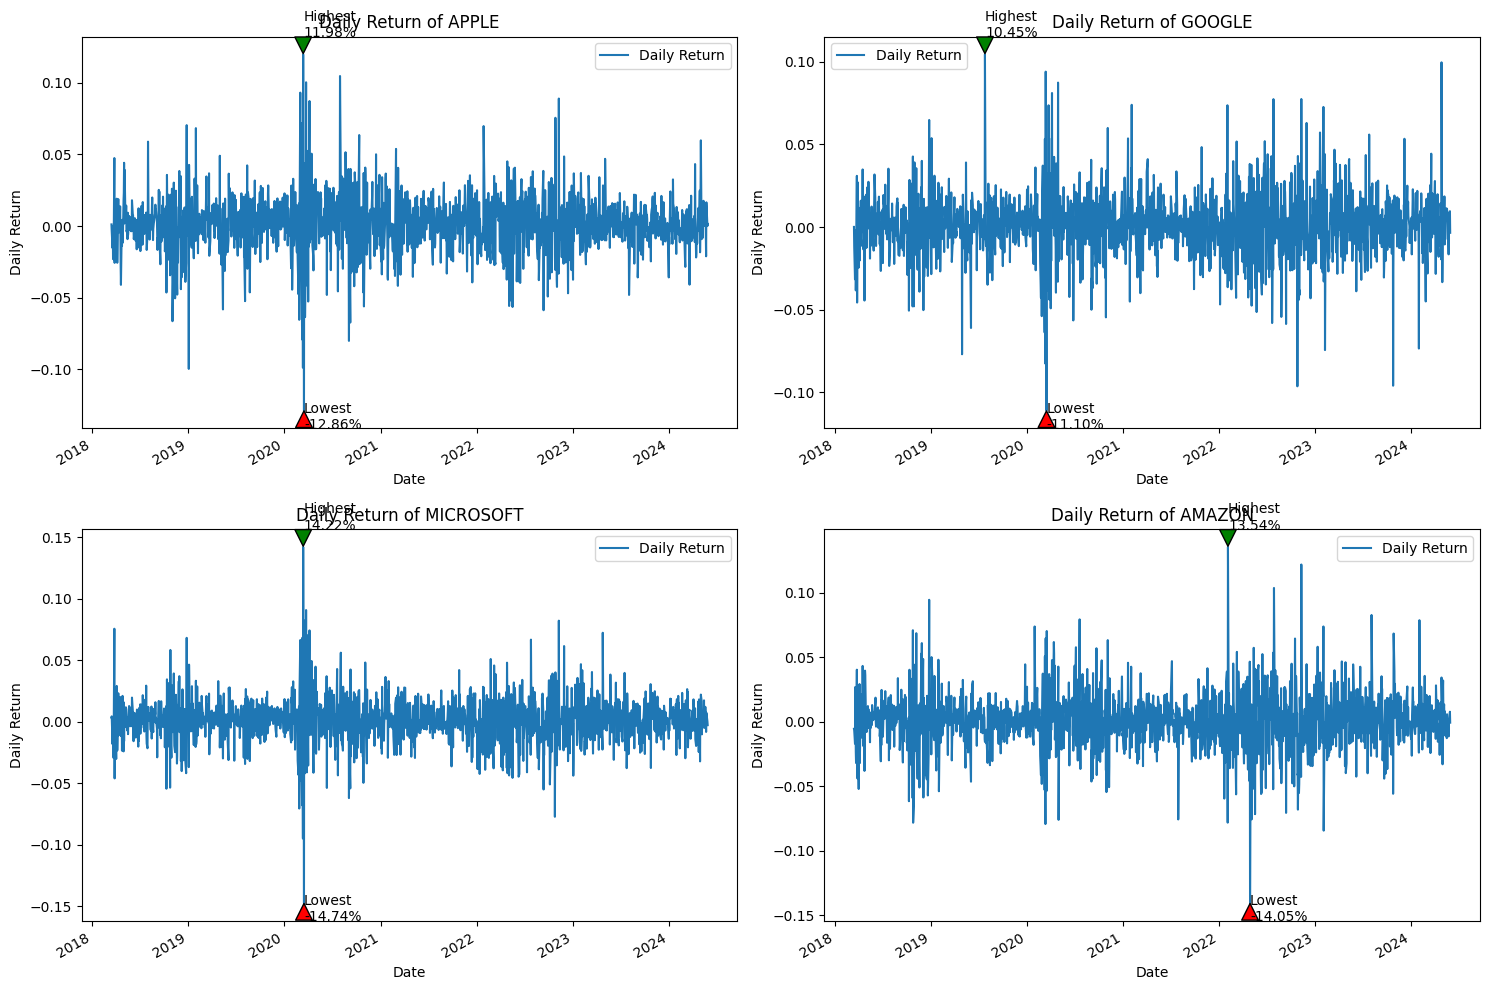

In [17]:
# Calculate daily return for each company
daily_returns = {}
for company, df in stock_data.items():
    df['Daily Return'] = df['Adj Close'].pct_change()
    daily_returns[company] = df['Daily Return']

# Plot daily return for each company
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, daily_return) in enumerate(daily_returns.items(), 1):
    plt.subplot(2, 2, i)
    daily_return.plot(legend=True)

    # Annotate highest and lowest points
    max_return = daily_return.max()
    min_return = daily_return.min()
    max_date = daily_return.idxmax()
    min_date = daily_return.idxmin()

    plt.annotate(f'Highest\n{max_return:.2%}', xy=(max_date, max_return), xytext=(max_date, max_return*1.1),
                 arrowprops=dict(facecolor='green', shrink=0.05))
    plt.annotate(f'Lowest\n{min_return:.2%}', xy=(min_date, min_return), xytext=(min_date, min_return*1.1),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.title(f'Daily Return of {company}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')

plt.tight_layout()
plt.show()

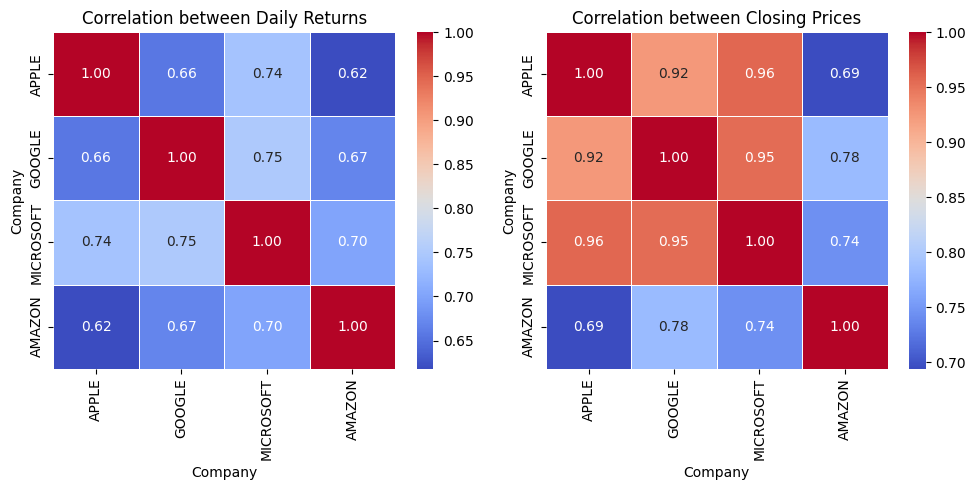

In [18]:
# Calculate daily return for each company
apple_df['Daily Return'] = apple_df['Adj Close'].pct_change()
google_df['Daily Return'] = google_df['Adj Close'].pct_change()
microsoft_df['Daily Return'] = microsoft_df['Adj Close'].pct_change()
amazon_df['Daily Return'] = amazon_df['Adj Close'].pct_change()

# Combine the daily returns into a single DataFrame
returns = pd.DataFrame({
    "APPLE": apple_df["Daily Return"],
    "GOOGLE": google_df["Daily Return"],
    "MICROSOFT": microsoft_df["Daily Return"],
    "AMAZON": amazon_df["Daily Return"]
})

# Drop rows with NaN values to ensure the correlation matrix can be computed
returns.dropna(inplace=True)

# Calculate the correlation matrix for daily returns
return_correlation_matrix = returns.corr()

# Combine the closing prices into a single DataFrame
closing_prices = pd.DataFrame({
    "APPLE": apple_df["Adj Close"],
    "GOOGLE": google_df["Adj Close"],
    "MICROSOFT": microsoft_df["Adj Close"],
    "AMAZON": amazon_df["Adj Close"]
})

# Drop rows with NaN values to ensure the correlation matrix can be computed
closing_prices.dropna(inplace=True)

# Calculate the correlation matrix for closing prices
closing_price_correlation_matrix = closing_prices.corr()

# Plotting both heatmaps in a single figure
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot correlation matrix of daily returns as heatmap
sns.heatmap(return_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=ax[0])
ax[0].set_title("Correlation between Daily Returns")
ax[0].set_xlabel("Company")
ax[0].set_ylabel("Company")

# Plot correlation matrix of closing prices as heatmap
sns.heatmap(closing_price_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", ax=ax[1])
ax[1].set_title("Correlation between Closing Prices")
ax[1].set_xlabel("Company")
ax[1].set_ylabel("Company")

# Display the plots
plt.tight_layout()
plt.show()

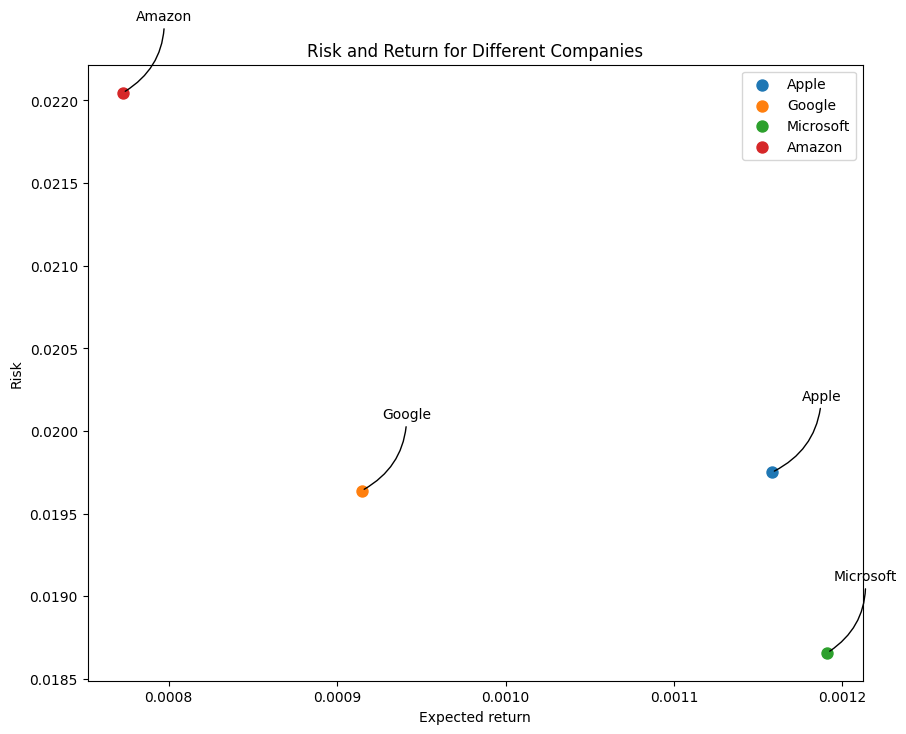

In [19]:
# Define area for scatter plot markers
area = np.pi * 20

# Create a list of DataFrames
dfs = [apple_df, google_df, microsoft_df, amazon_df]
names = ["Apple", "Google", "Microsoft", "Amazon"]

# Plot scatter plot for each DataFrame
plt.figure(figsize=(10, 8))
for df, name in zip(dfs, names):
    # Calculate mean and standard deviation of daily returns
    mean_return = df['Daily Return'].mean()
    std_return = df['Daily Return'].std()

    # Plot scatter plot
    plt.scatter(mean_return, std_return, s=area, label=name)

    # Add annotation
    plt.annotate(name, xy=(mean_return, std_return), xytext=(50, 50), textcoords='offset points',
                 ha='right', va='bottom', arrowprops=dict(arrowstyle='-', color='black', connectionstyle='arc3,rad=-0.3'))

# Set labels and title
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Risk and Return for Different Companies')

# Add legend
plt.legend()

# Show plot
plt.show()

In [20]:
google_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MACD_12_26_9',
       'MACDh_12_26_9', 'MACDs_12_26_9', 'RSI_14', 'BBL_5_2.0', 'BBM_5_2.0',
       'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'OBV', 'SMA_20', 'EMA_50',
       'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ADX_14', 'DMP_14', 'DMN_14',
       'WILLR_14', 'CMF_20', 'PSARaf_0.02_0.2', 'OBV_in_million',
       'MACD_histogram_12_26_9', 'Daily Return'],
      dtype='object')

In [21]:
# Drop the specified columns
google_df.drop(['Adj Close','MACDh_12_26_9','BBL_5_2.0',
       'BBM_5_2.0', 'BBU_5_2.0', 'BBB_5_2.0', 'BBP_5_2.0', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ADX_14', 'DMP_14',
       'DMN_14', 'WILLR_14', 'CMF_20', 'PSARaf_0.02_0.2', 'OBV_in_million',
       'MACD_histogram_12_26_9'], axis=1, inplace=True)

In [22]:
# Print the DataFrame to verify changes
print(google_df.head())
google_df.isna().sum()
google_df.dropna(inplace =True)

                 Open       High        Low      Close    Volume  \
Date                                                               
2018-03-14  57.260502  57.929501  57.071999  57.474499  25828000   
2018-03-15  57.498001  58.054001  56.727001  57.479000  27908000   
2018-03-16  57.707001  57.793999  56.598000  56.786499  61840000   
2018-03-19  56.000500  56.099499  54.450500  54.991001  56118000   
2018-03-20  54.950001  55.259998  54.173000  54.885502  36638000   

            MACD_12_26_9  MACDs_12_26_9     RSI_14          OBV     SMA_20  \
Date                                                                         
2018-03-14      0.534946       0.182405  58.411601  385220000.0  55.625700   
2018-03-15      0.587426       0.263409  58.429434  413128000.0  55.825400   
2018-03-16      0.566605       0.324048  54.553722  351288000.0  55.940925   
2018-03-19      0.400605       0.339360  46.028665  295170000.0  55.953475   
2018-03-20      0.257567       0.323001  45.577976  258

In [23]:
google_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'MACD_12_26_9',
       'MACDs_12_26_9', 'RSI_14', 'OBV', 'SMA_20', 'EMA_50', 'Daily Return'],
      dtype='object')

Shapes of X_train, X_test, y_train, y_test: (1093, 11) (469, 11) (1093,) (469,)
Metrics:
+-------------------------+----------+
| Metric                  |    Value |
|-------------------------+----------|
| Mean Absolute Error     | 0.356044 |
| Mean Squared Error      | 0.23319  |
| Root Mean Squared Error | 0.482898 |
| R^2 Score               | 0.999802 |
+-------------------------+----------+

Intercept and Coefficients:
+--------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Parameter    | Value                                                                                                                                                                                                                       |
|--------------+----------------------------------------------------------------------------

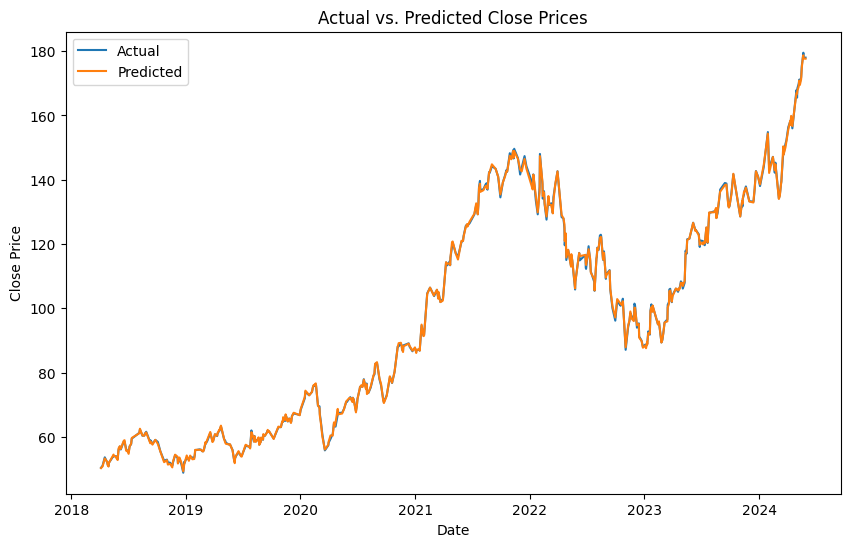

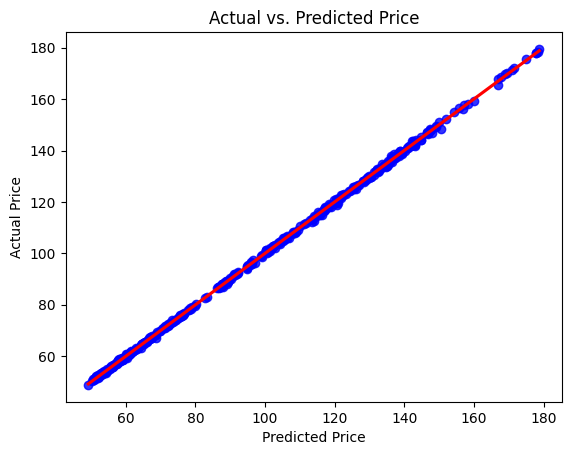

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Import metrics functions

def prediction(google_df):
    # Define features and target
    X = google_df[['Open', 'High', 'Low', 'Volume', 'MACD_12_26_9',
       'MACDs_12_26_9', 'RSI_14', 'OBV', 'SMA_20', 'EMA_50', 'Daily Return']]
    y = google_df['Close']

    # Normalize features using Min-Max scaling
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    print("Shapes of X_train, X_test, y_train, y_test:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    # Fit the linear regression model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate metrics using imported functions directly
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store intercept and coefficients
    intercept = regressor.intercept_
    coefficients = regressor.coef_

    # Extract the dates corresponding to the test set
    test_dates = y_test.index

    # Create DataFrame to compare actual and predicted values
    compare = pd.DataFrame({
        'Date': test_dates,
        'Actual': y_test.values,
        'Predicted': y_pred
    })

    # Set date as index
    compare.set_index('Date', inplace=True)

    # Sort DataFrame by date
    compare = compare.sort_index()

    # Display metrics using tabulate
    metrics_data = [
        ['Mean Absolute Error', mae],
        ['Mean Squared Error', mse],
        ['Root Mean Squared Error', rmse],
        ['R^2 Score', r2]
    ]
    print("Metrics:")
    print(tabulate(metrics_data, headers=['Metric', 'Value'], tablefmt='psql'))

    # Display intercept and coefficients using tabulate
    intercept_coefficients_data = [
        ['Intercept', intercept],
        ['Coefficients', ', '.join(map(str, coefficients))]  # Convert coefficients array to a string
    ]
    print("\nIntercept and Coefficients:")
    print(tabulate(intercept_coefficients_data, headers=['Parameter', 'Value'], tablefmt='psql'))

    # Display comparison DataFrame
    print("\nComparison DataFrame:")
    print(compare)

    # Plot predicted vs. actual values
    plt.figure(figsize=(10, 6))
    plt.plot(compare.index, compare['Actual'], label='Actual')
    plt.plot(compare.index, compare['Predicted'], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title('Actual vs. Predicted Close Prices')
    plt.legend()
    plt.show()

    # Plot regression plot
    sns.regplot(x=y_pred.flatten(), y=y_test.values.flatten(), scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Actual vs. Predicted Price')
    plt.show()

    return regressor, scaler, mae, mse, rmse, r2, compare

# Call the function and get the regressor object, scaler, metrics, and comparison DataFrame
regressor, scaler, mae, mse, rmse, r2, comparison_df = prediction(google_df)

In [25]:
# Sort comparison DataFrame by date
comparison_df_sorted = comparison_df.sort_index()

# Remove 'level_0' and 'index' columns
#comparison_df_sorted.drop(['level_0', 'index'], axis=1, inplace=True)

# Calculate the difference between Actual and Predicted values and round to 2 decimal places
comparison_df_sorted['Difference'] = round(comparison_df_sorted['Actual'] - comparison_df_sorted['Predicted'], 2)

# Display comparison DataFrame in tabular form
print("\nComparison DataFrame Sorted by Date:")
print(comparison_df_sorted.tail().to_string(index=False))


Comparison DataFrame Sorted by Date:
    Actual  Predicted  Difference
175.429993 174.868773        0.56
178.460007 178.500796       -0.04
179.539993 178.740432        0.80
178.000000 177.711669        0.29
178.020004 177.682025        0.34


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def prediction(google_df, future_days=30):
    # Define features and target
    X = google_df[['Open', 'High', 'Low', 'Volume', 'MACD_12_26_9',
                   'MACDs_12_26_9', 'RSI_14', 'OBV', 'SMA_20', 'EMA_50', 'Daily Return']]
    y = google_df['Close']

    # Normalize features using Min-Max scaling
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform train-test split (if needed)
    # X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Fit the linear regression model
    regressor = LinearRegression()
    regressor.fit(X_scaled, y)

    # Predicting for the future dates
    future_dates = pd.date_range(google_df.index[-1] + pd.DateOffset(1), periods=future_days, freq='D')
    future_features = google_df.iloc[-1*future_days:][['Open', 'High', 'Low', 'Volume', 'MACD_12_26_9',
                                                       'MACDs_12_26_9', 'RSI_14', 'OBV', 'SMA_20', 'EMA_50', 'Daily Return']]
    future_features_scaled = scaler.transform(future_features)
    future_predictions = regressor.predict(future_features_scaled)

    # Creating a DataFrame for future predictions
    future_prediction_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted': future_predictions
    })
    future_prediction_df.set_index('Date', inplace=True)

    # Create figure with plotly
    fig = go.Figure()

    # Historical data trace
    fig.add_trace(go.Scatter(x=google_df.index, y=google_df['Close'], mode='lines+markers', name='Historical Close'))

    # Future predictions trace
    fig.add_trace(go.Scatter(x=future_prediction_df.index, y=future_prediction_df['Predicted'], mode='lines+markers', name='Predicted Close'))

    # Update layout for better interactive controls
    fig.update_layout(
        title='Historical vs Predicted Close Prices',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1, label="1m", step="month", stepmode="backward"),
                    dict(count=6, label="6m", step="month", stepmode="backward"),
                    dict(count=1, label="YTD", step="year", stepmode="todate"),
                    dict(count=1, label="1y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
            title="Close Price",
            autorange=True,
            type="linear"
        )
    )

    fig.show()

    return regressor, scaler, future_prediction_df

In [27]:
# Assuming google_df is your historical data DataFrame
regressor, scaler, future_predictions = prediction(google_df, future_days=30)

# Print or visualize future_predictions DataFrame
print("Future Predictions:")
print(future_predictions)

# Additional plotting or analysis as needed

Future Predictions:
             Predicted
Date                  
2024-05-30  157.591630
2024-05-31  157.572366
2024-06-01  155.358287
2024-06-02  158.050552
2024-06-03  159.424113
2024-06-04  160.456969
2024-06-05  156.847905
2024-06-06  173.043585
2024-06-07  167.041461
2024-06-08  166.189564
2024-06-09  166.867313
2024-06-10  167.810158
2024-06-11  167.226499
2024-06-12  169.020826
2024-06-13  172.300355
2024-06-14  170.929313
2024-06-15  171.121240
2024-06-16  169.577905
2024-06-17  169.748653
2024-06-18  171.405904
2024-06-19  173.119757
2024-06-20  174.914245
2024-06-21  176.382379
2024-06-22  178.549730
2024-06-23  178.813259
2024-06-24  177.795715
2024-06-25  176.425349
2024-06-26  176.566324
2024-06-27  177.731911
2024-06-28  177.263319


In [28]:
# Split the data into training and testing sets

train_df = pd.DataFrame(google_df['Close'][0: int(len(google_df)*0.80)])
test_df = pd.DataFrame(google_df['Close'][int(len(google_df)*0.80):int(len(df))])
print(train_df.shape)
print(test_df.shape)

(1249, 1)
(313, 1)


In [29]:
# Initialize MinMaxScaler to scale the data between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))

In [30]:
# Fit and transform the training data using MinMaxScaler

train_df_arr = scaler.fit_transform(train_df)
train_df_arr

array([[0.08506545],
       [0.07826943],
       [0.06064889],
       ...,
       [0.4051993 ],
       [0.40716209],
       [0.40922297]])

In [31]:
# Prepare the training data (input features and target)

x_train = []
y_train = []
for i in range(100, train_df_arr.shape[0]):
    x_train.append(train_df_arr[i-100: i])
    y_train.append(train_df_arr[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((1149, 100, 1), (1149,))

In [32]:
# Build the LSTM model

model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(64, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(16, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 100, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           12416     
                                                                 
 dropout_2 (Dropout)         (None, 100, 32)           0         
                                                                 
 lstm_3 (LSTM)               (None, 16)                3

In [34]:
# Compile the model

model.compile(loss='mean_squared_error', optimizer='adam')
# Train the model

history = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
36/36 [==============================] - 22s 398ms/step - loss: 0.1033
Epoch 2/50
36/36 [==============================] - 14s 396ms/step - loss: 0.0497
Epoch 3/50
36/36 [==============================] - 14s 400ms/step - loss: 0.0394
Epoch 4/50
36/36 [==============================] - 14s 392ms/step - loss: 0.0310
Epoch 5/50
36/36 [==============================] - 14s 397ms/step - loss: 0.0324
Epoch 6/50
36/36 [==============================] - 14s 393ms/step - loss: 0.0287
Epoch 7/50
36/36 [==============================] - 14s 379ms/step - loss: 0.0264
Epoch 8/50
36/36 [==============================] - 14s 384ms/step - loss: 0.0241
Epoch 9/50
36/36 [==============================] - 14s 386ms/step - loss: 0.0228
Epoch 10/50
36/36 [==============================] - 14s 388ms/step - loss: 0.0236
Epoch 11/50
36/36 [==============================] - 14s 385ms/step - loss: 0.0202
Epoch 12/50
36/36 [==============================] - 14s 385ms/step - loss: 0.0212
Epoch 13/50
3

In [35]:
# Prepare the test data (input features and target)

past_100_days = train_df.tail(100)
final_df = past_100_days._append(test_df, ignore_index=True)
final_df.head()
input_data = scaler.fit_transform(final_df)
input_data.shape
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((313, 100, 1), (313,))

In [36]:
# Predict the prices using the trained model

y_pred = model.predict(x_test)
y_pred.shape

10/10 [==============================] - 1s 70ms/step


(313, 1)

In [37]:
# Rescale the predicted and actual prices

scale = scaler.scale_
scale_factor = 1/scale
y_pred = y_pred*scale_factor
y_test = y_test*scale_factor

In [38]:
y_pred

array([[12.23576428],
       [11.61235334],
       [11.10557691],
       [10.69352962],
       [10.374587  ],
       [10.14747379],
       [10.02620343],
       [10.01544325],
       [10.10073325],
       [10.26025108],
       [10.47942511],
       [10.7526262 ],
       [11.10378784],
       [11.57086121],
       [12.19043782],
       [13.00086962],
       [14.01445682],
       [15.22223833],
       [16.5824186 ],
       [18.01904944],
       [19.42920918],
       [20.70349689],
       [21.76014201],
       [22.5505033 ],
       [23.06127007],
       [23.31021566],
       [23.36357576],
       [23.29878278],
       [23.18532279],
       [23.0756957 ],
       [23.02349634],
       [23.07818179],
       [23.25400163],
       [23.52914351],
       [23.85912112],
       [24.19453464],
       [24.4892647 ],
       [24.71165905],
       [24.8298379 ],
       [24.8199107 ],
       [24.69976531],
       [24.51068774],
       [24.30127488],
       [24.10787779],
       [23.95588407],
       [23

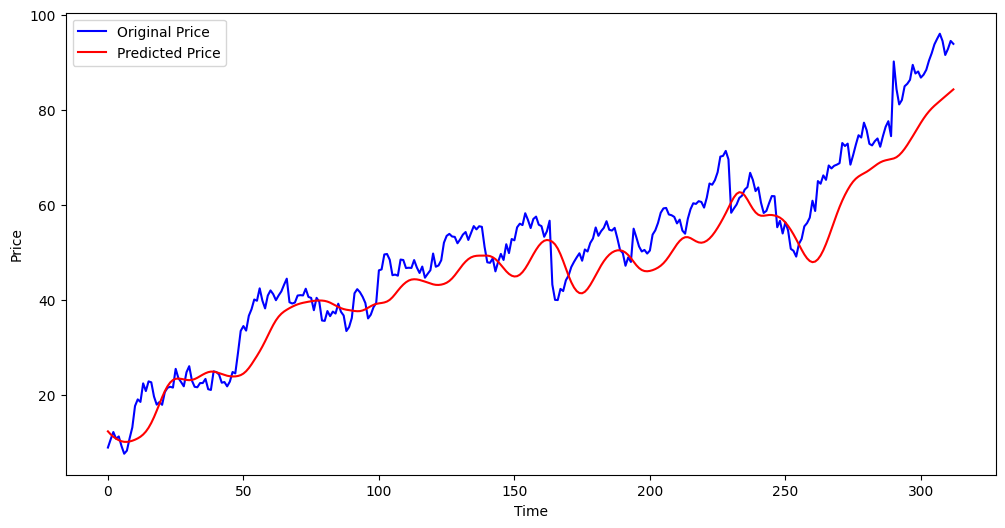

In [39]:
# Plot the original and predicted prices

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_pred, 'r', label="Predicted Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()